Test Dataset: Mean Absolute Error: 42.79
Test Dataset: Mean Absolute Percentage Error: 0.37
Train Dataset: Mean Absolute Error: 43.48
Train Dataset: Mean Absolute Percentage Error: 0.39
y = 0.14 * x_0 + -23.06 * x_1 + 5.85 * x_2 + 1.20 * x_3 + -1.28 * x_4 + 0.81 * x_5 + 0.60 * x_6 + 10.16 * x_7 + 67.11 * x_8 + 0.20 * x_9 + -341.38
Test Dataset: Mean Absolute Error: 43.58
Test Dataset: Mean Absolute Percentage Error: 0.38
Train Dataset: Mean Absolute Error: 39.14
Train Dataset: Mean Absolute Percentage Error: 0.34
MAE - Linear Regression: 42.79
MAE - Polynomial Regression: 43.58
MAPE - Linear Regression: 0.37
MAPE - Polynomial Regression: 0.38
R-squared - Linear Regression: 0.45
R-squared - Polynomial Regression: 0.42


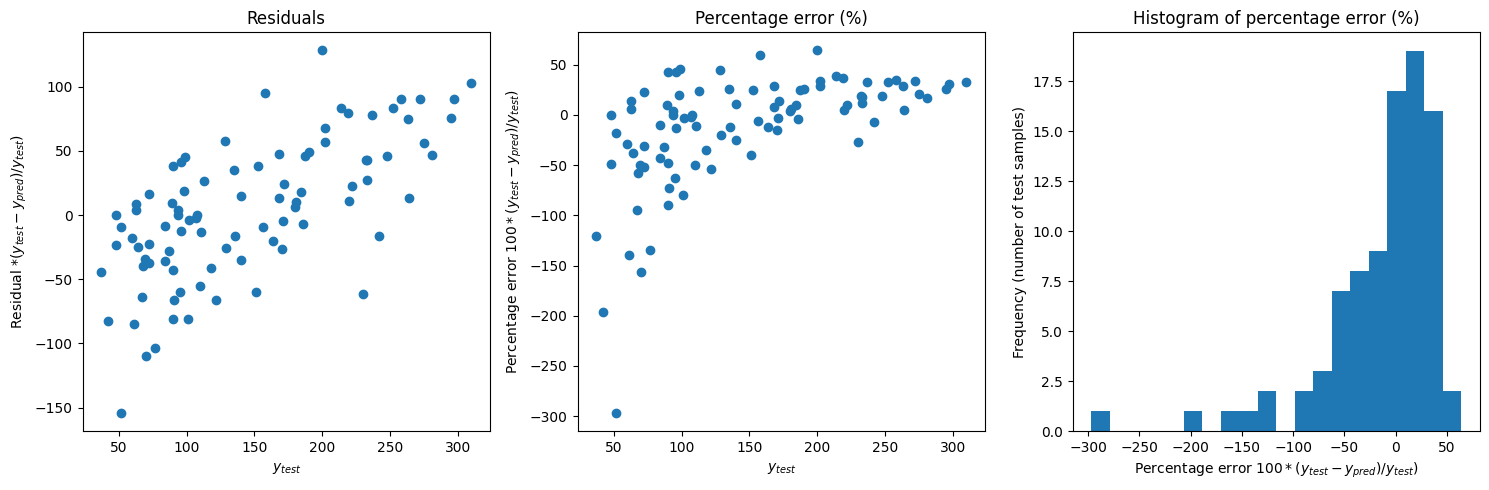

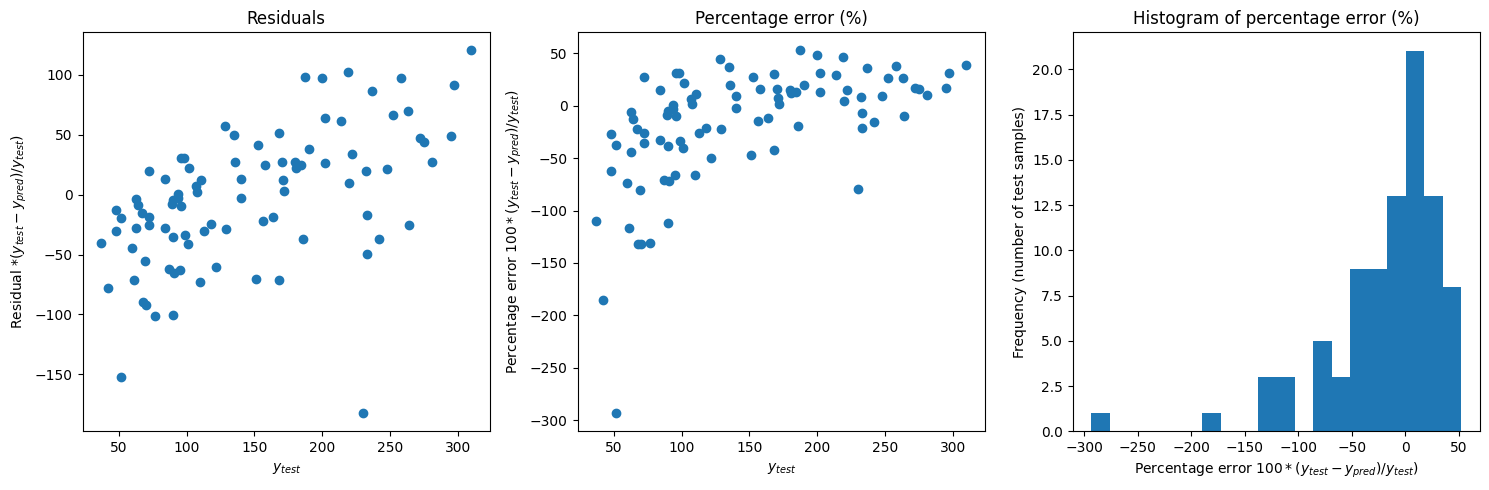

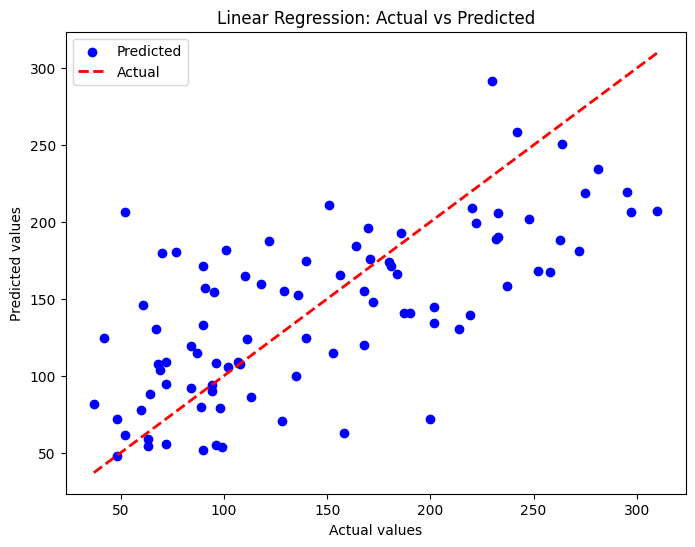

In [2]:
from sklearn import datasets
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error

def model_estimation(model, y_train, y_test, y_pred_train, y_pred_test):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
    ax1.scatter(y_test, y_test - y_pred_test)
    ax1.set_xlabel('$y_{test}$')
    ax1.set_ylabel('Residual $*(y_{test} - y_{pred}) / y_{test})$')
    ax1.set_title('Residuals')
    ax2.scatter(y_test, 100. * (y_test - y_pred_test) / y_test)
    ax2.set_xlabel('$y_{test}$')
    ax2.set_ylabel('Percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax2.set_title('Percentage error (%)')
    ax3.hist(100. * (y_test - y_pred_test) / y_test, bins=20)
    ax3.set_xlabel('Percentage error $100*(y_{test} - y_{pred}) / y_{test})$')
    ax3.set_ylabel('Frequency (number of test samples)')
    ax3.set_title('Histogram of percentage error (%)')

    print(f'Test Dataset: Mean Absolute Error: {mean_absolute_error(y_test, y_pred_test):.2f}')
    print(f'Test Dataset: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_test, y_pred_test):.2f}')
    print(f'Train Dataset: Mean Absolute Error: {mean_absolute_error(y_train, y_pred_train):.2f}')
    print(f'Train Dataset: Mean Absolute Percentage Error: {mean_absolute_percentage_error(y_train, y_pred_train):.2f}')

    if model.__class__ == LinearRegression:
        print('y = ', end='')
        for i, coef in enumerate(model.coef_):
            print(f'{coef:.2f} * x_{i} + ', end='')
        print(f'{model.intercept_:.2f}')
    elif model.__class__ == make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression):
        print('y = ', end='')
        for i, coef in enumerate(model.named_steps['linearregression'].coef_):
            print(f'{coef:.2f} * x_{i} + ', end='')
        print(f'{model.named_steps["linearregression"].intercept_:.2f}')

    fig.tight_layout()


# Load the diabetes dataset
X, y = datasets.load_diabetes(as_frame=True, scaled=False, return_X_y=True)

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Multivariate linear regression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred_train_linear = linear_reg.predict(X_train)
y_pred_test_linear = linear_reg.predict(X_test)

# Multivariate polynomial regression of degree 2
poly_reg = make_pipeline(PolynomialFeatures(degree=2, include_bias=False), LinearRegression())
poly_reg.fit(X_train, y_train)
y_pred_train_poly = poly_reg.predict(X_train)
y_pred_test_poly = poly_reg.predict(X_test)

# Evaluate the models using MAE, MAPE, and plot the results
model_estimation(linear_reg, y_train, y_test, y_pred_train_linear, y_pred_test_linear)
model_estimation(poly_reg, y_train, y_test, y_pred_train_poly, y_pred_test_poly)


# Calculate additional evaluation metrics
mae_linear = mean_absolute_error(y_test, y_pred_test_linear)
mae_poly = mean_absolute_error(y_test, y_pred_test_poly)
mape_linear = mean_absolute_percentage_error(y_test, y_pred_test_linear)
mape_poly = mean_absolute_percentage_error(y_test, y_pred_test_poly)

# Print additional evaluation metrics
print(f'MAE - Linear Regression: {mae_linear:.2f}')
print(f'MAE - Polynomial Regression: {mae_poly:.2f}')
print(f'MAPE - Linear Regression: {mape_linear:.2f}')
print(f'MAPE - Polynomial Regression: {mape_poly:.2f}')


# Comparing R-squared values
r2_linear = linear_reg.score(X_test, y_test)
r2_poly = poly_reg.score(X_test, y_test)
print(f'R-squared - Linear Regression: {r2_linear:.2f}')
print(f'R-squared - Polynomial Regression: {r2_poly:.2f}')

# Plotting the predicted values against the actual values for linear regression
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_linear, color='blue', label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2, label='Actual')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()
plt.show()
